In [1]:
import json
import csv
import tweepy
import re
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import pie, axis, show
from matplotlib import rcParams


## Reading Json data of tweets

In [2]:
lines = []
with open("INDvsAUS1.json") as file_in:
    for line in file_in:
        lines.append(json.loads(line))
        
df = pd.DataFrame(lines)
df.head(5)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1339654889132179459,1339654889132179459,2020-12-18 01:03:09 IST,2020-12-18,01:03:09,+0530,58649638,redjockey,Vin Thachin,,...,,,,,,[],,,,
1,1339647037093027840,1339647037093027840,2020-12-18 00:31:57 IST,2020-12-18,00:31:57,+0530,93790936,hisaurabh,Saurabh Kumar Singh,,...,,,,,,[],,,,
2,1339646080527396864,1339646080527396864,2020-12-18 00:28:09 IST,2020-12-18,00:28:09,+0530,734118344,imvikaskohli,Vikas Kohli,,...,,,,,,[],,,,
3,1339645151010979840,1339645151010979840,2020-12-18 00:24:28 IST,2020-12-18,00:24:28,+0530,1354208443,anandsukhinder,Sukhinder Anand,,...,,,,,,[],,,,
4,1339643143273123840,1339643143273123840,2020-12-18 00:16:29 IST,2020-12-18,00:16:29,+0530,780778339120197632,lakhansharma_18,Lakhan Sharma,,...,,,,,,[],,,,


## All the attributes that json data has

In [3]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

## Sample tweet

In [4]:
df.iloc[90]['tweet']

'Ind vs Aus: Virat Kohli के अर्धशतक के बावजूद मुश्किल में भारत, पहले दिन स्कोर-233/6 #IndvsAus #AdelaideTest #ViratKohli #CheteshwarPujara #Rahane    https://t.co/xWYkdHTBYY'

## Reading User data for the users who tweated

In [5]:
lines = []
with open("user_data.json") as file_in:
    for line in file_in:
        lines.append(json.loads(line))
user_df = pd.DataFrame(lines)


# Follower Count
The pie chart shows the data for number of followers of users who tweeted.

In [6]:
print("Maximum, Minimum Followers")
user_df['followers'].max(), user_df['followers'].min()

Maximum, Minimum Followers


(13287039, 0)

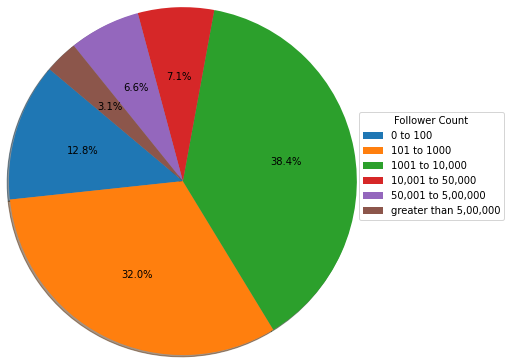

In [7]:
x_value = [100, 1000, 10000, 50_000, 5_00_000, 100_00_000]
y_value = []
for i in x_value:
    y_value.append(0)
  
for i in user_df['followers']:
    for idx,j in enumerate(x_value):
        if j > i:
            y_value[idx] = y_value[idx] + 1
            break
            

plt.pie(y_value, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%')
legend_array = ['0 to 100', '101 to 1000', '1001 to 10,000', '10,001 to 50,000', '50,001 to 5,00,000', 'greater than 5,00,000' ]
plt.legend(legend_array, loc="lower right", title='Follower Count', bbox_to_anchor=(2.0, 0.3))
plt.show()

# Following Count
The pie chart shows the data for number of following of users who tweeted.

In [8]:
print("Maximum, Minimum Following")
user_df['following'].max(), user_df['following'].min()

Maximum, Minimum Following


(19542, 0)

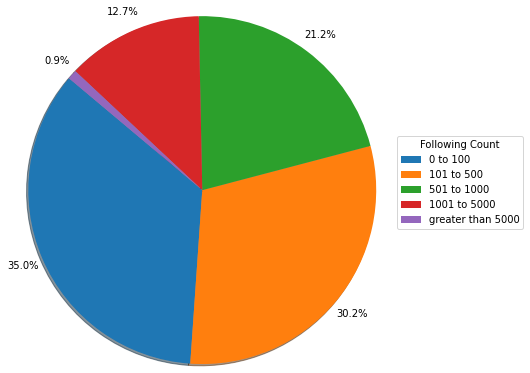

In [9]:
x_value = [100, 500, 1000, 5000, 10000]
y_value = []
for i in x_value:
    y_value.append(0)
  
for i in user_df['following']:
    for idx,j in enumerate(x_value):
        if j > i:
            y_value[idx] = y_value[idx] + 1
            break
            

plt.pie(y_value, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%', pctdistance=1.12)
legend_array = ['0 to 100', '101 to 500', '501 to 1000', '1001 to 5000', 'greater than 5000' ]
plt.legend(legend_array, loc="lower right", title='Following Count', bbox_to_anchor=(2.0, 0.3))
plt.show()

# Tweet Frequency
This is basically average number of tweets that user posts per day. It is basically the ratio of **(tweets / number_of_days_after_user_joined_twitter)**

In [10]:
from datetime import date
import datetime

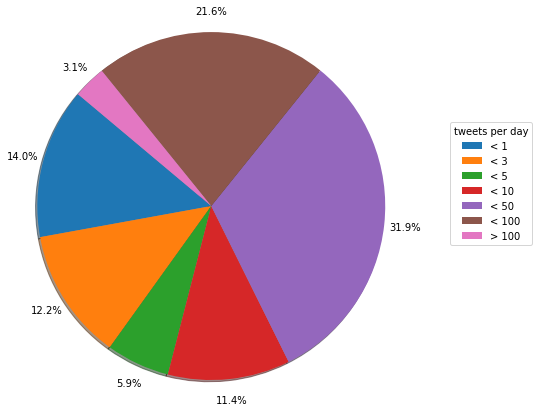

In [11]:
def tweet_freq(x):
#     print(x)
    d2 = date(2020, 12, 18)
    d1 = datetime.datetime.strptime( x['join_date'], '%Y-%m-%d').date()
    delta = d2 - d1
    ret = x['tweets']/delta.days
    return ret


user_df['tweet_freq'] = user_df.apply(lambda x: tweet_freq(x), axis=1)
user_df['tweet_freq'].max(), user_df['tweet_freq'].min()


tweet_freq_base = [1, 3, 5, 10, 50, 100, 1000]
res = []
for i in tweet_freq_base:
    res.append(0)
    
for index, row in user_df.iterrows():
    for idx,freq in enumerate(tweet_freq_base):
        if freq > row['tweet_freq']:
            res[idx] = res[idx] + 1
            break

plt.pie(res, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%', pctdistance=1.12)

legend_array = ['< 1', '< 3', '< 5', '< 10', '< 50', '< 100', '> 100' ]
plt.legend(legend_array, loc="lower right", title='tweets per day', bbox_to_anchor=(2.0, 0.3))
plt.show()

# Media Count

The count of media (like gif, images, videos, etc) that user has posted on his timeline. The pie chart shows the percentage of users with media count in this range.

In [12]:
user_df['media'].min(), user_df['media'].max()

(0, 280490)

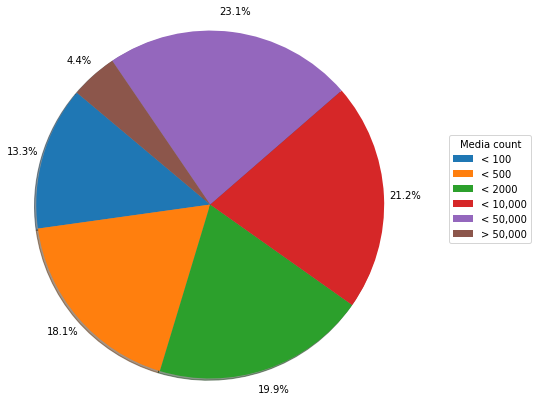

In [13]:


media_counts = [100, 500, 2000, 10000, 50000, 1000000]
res = []
for i in media_counts:
    res.append(0)
    
for index, row in user_df.iterrows():
    for idx,freq in enumerate(media_counts):
        if freq > row['media']:
            res[idx] = res[idx] + 1
            break

plt.pie(res, shadow=True, startangle=140, radius=2,  autopct='%1.1f%%', pctdistance=1.12)

legend_array = ['< 100', '< 500', '< 2000', '< 10,000', '< 50,000', '> 50,000']
plt.legend(legend_array, loc="lower right", title='Media count', bbox_to_anchor=(2.0, 0.3))
plt.show()
    

# Language Analysis for the data
Plotting for Tweets vs Language of tweets.

In [14]:
df.groupby(['language']).size().reset_index(name='counts').head(5)

,language,counts
0,bn,120
1,ca,9
2,cs,12
3,cy,5
4,da,25


In [15]:
lang_df = df.groupby(['language']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).reset_index(drop=True)
lang_df.head(5)

,language,counts
0,en,12173
1,hi,1143
2,und,908
3,ta,402
4,in,379


In [16]:
lang_arr = lang_df['language'].head(15).to_list()
count_arr = lang_df['counts'].head(15).to_list()
# lang_arr
lang_arr.append('others')
# lang_arr
count_arr.append(0)
for i in range(16,37):
    count_arr[-1] = count_arr[-1] + lang_df['counts'][i]

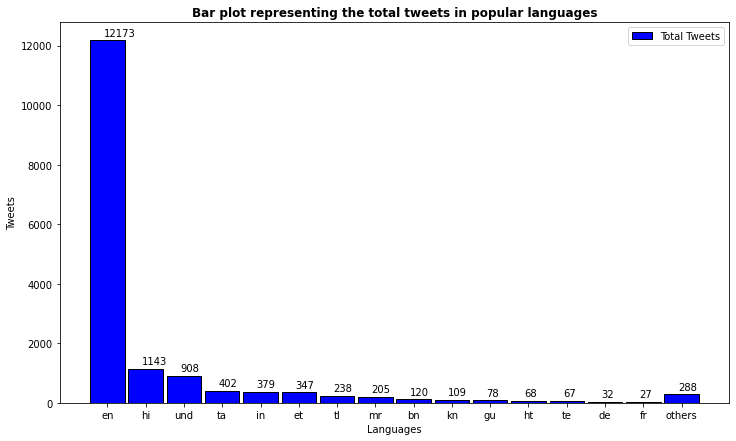

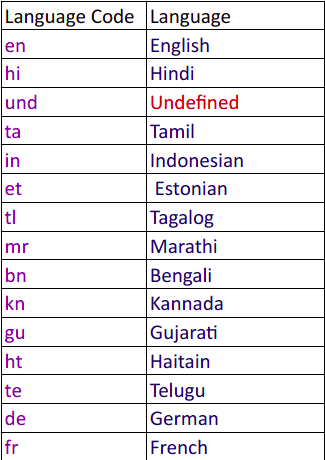

In [17]:
plt.figure(figsize = (12,7))
plt.bar(lang_arr, count_arr, width= 0.9, align='center',color='blue', edgecolor = 'black')
i = 1.0
j = 150
# Annotating the bar plot with the values (total death count)
for i in range(len(lang_arr)):
    plt.annotate(count_arr[i], (-0.1 + i, count_arr[i] + j))
plt.legend(labels = ['Total Tweets'])
plt.title("Bar plot representing the total tweets in popular languages",fontweight="bold")
plt.xlabel('Languages')
plt.ylabel('Tweets')
# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

img1 = plt.show()
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "lang_code.png", width = 200, height = 100)